# Simulation of a tracking detector: one Coulomb scatter
In this hands-on you will see how to generate random events to reproduce the signal collected in a tracking detector.

For now we will see the influence of the one scatter on the final track deflection on the last layer.

Let's import the 'toy tracker':

In [1]:
%reload_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import toyTracker as tk

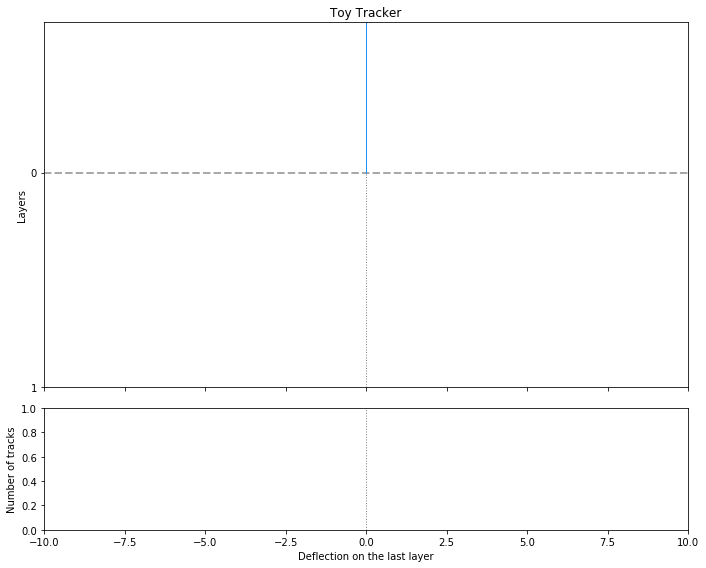

In [3]:
minx = -10.
maxx = +10.
fig, ax = tk.buildDetector(1, minx, maxx)
fig.show()
fig.canvas.draw()

The incoming track enters the first layer (zero) at $x = 0$. It's the blue track.
After scattering on the first layer, it will be deflected by an angle $\theta$.
The distribution of our scatter is assumed to be a uniform distribution of the angle theta.
This distribution will have edges: these are the extreme angular values the deflected track can take: $ \pm \theta_\text{max}$.
The parameter of interest here is the width of our uniform distribution: we want it centered from -$\theta_\text{max}$ to +$\theta_\text{max}$.

If $\theta_\text{max}$ = 45$^\circ$, draw such a uniform distribution.

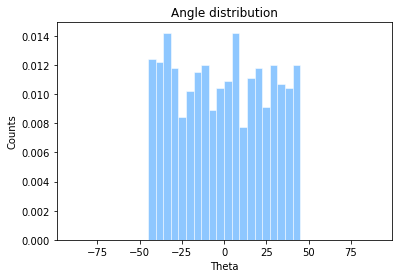

In [15]:
import random
import numpy as np

thetaMax = 45

nTracks = 1000
thetas  = []

for t in range(nTracks):
    aTheta = 2*thetaMax * random.uniform(0 , 1) - thetaMax
    thetas.append(aTheta)

fig2 = plt.figure()
plt.title('Angle distribution')
plt.xlabel('Theta')
plt.ylabel('Counts')
n, binArray, patches = plt.hist(thetas, 40, range=[-90, 90], color='dodgerblue', density=True, alpha=0.5, ec='w')
fig2.show()

Good! Now let's draw a track from the first layer (0,0) to the second layer, deflected by an angle $\theta$.
Some trigonometry question... what is the deflection $\Delta x$ on the next layer if the track is deflected by $\theta$? Write this inside a function.

Hint 1: think of the input / outputs.
Hint 2: think of the units.

You can use the numpy functions.

In [17]:
%reload_ext autoreload
import toyTracker as tk

# Function to get the deflection:

def getDeflectionWithAngle(angleInDegrees, distanceLayers=1):

    deflection = np.tan(np.deg2rad(angleInDegrees)) * distanceLayers

    return deflection


aDeflectedAngle = 45.
d_interlayer    =  1.

deflection      = getDeflectionWithAngle(aDeflectedAngle, d_interlayer)

print("With a deflected angle of %.1f, my deflection is %.2f"%(aDeflectedAngle, deflection))







With a deflected angle of 45.0, my deflection is 1.00


Now let's draw a track matching this deflection.

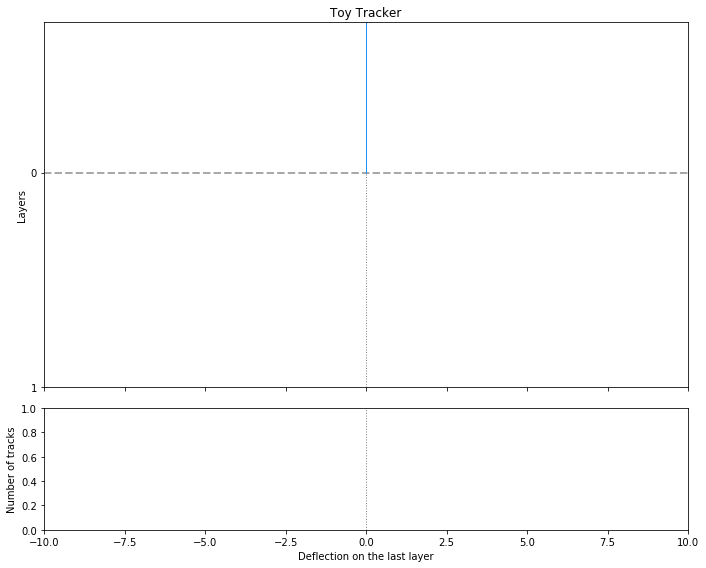

In [8]:
fig, ax = tk.buildDetector(1, minx, maxx)

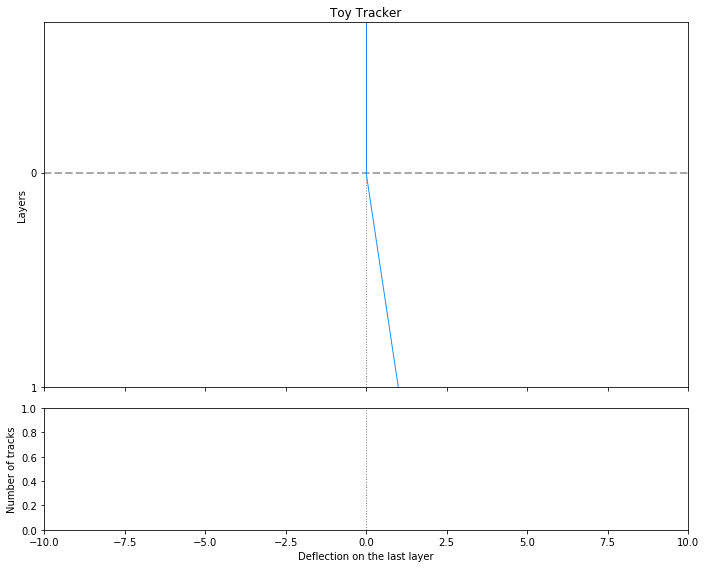

In [9]:
fig, ax = tk.buildDetector(1, minx, maxx)

theta = 45
x = [0., getDeflectionWithAngle(theta)]
y = [0 , 1]

ax[0].plot(x,y, color='dodgerblue')
fig.canvas.draw()


Nice! We could simulate a deflected track!
But now let's shoot all the tracks that are deflected according to our uniform distribution (created below).
Draw all these tracks.


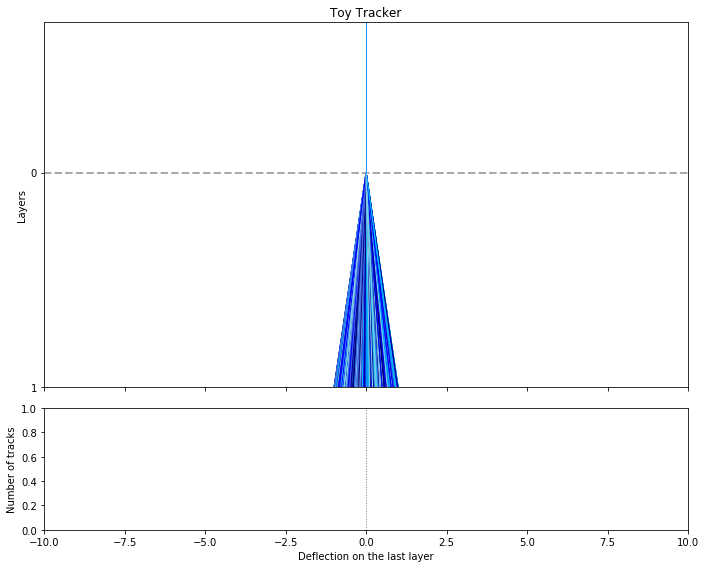

In [10]:





# thetaMax: 45
# nTracks : 500
# thetas  : filled with uniform



fig, ax = tk.buildDetector(1, minx, maxx)
# I want to plot them in different colors.
colors      = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']

for t in range(len(thetas)):
    x = [0., getDeflectionWithAngle(thetas[t])]
    y = [0, 1]
    ax[0].plot(x, y, color=colors[t%len(colors)])
fig.canvas.draw()



Now I want to plot the distribution of the deflected $\Delta x_i$ for each track $i$.

Write a function that, for a given $\theta_\text{max}$ and number of tracks $N_\text{tracks}$:
 * get a random theta uniformly distributed between $\pm \theta_\text{max}$
 * for each track, compute **and store** the deflected angle and the deflected position on the last layer
 * plot all the tracks on the upper pad
 * plot the distribution of the deflected positions on the last layer.
 
For convenience we will exceptionally plot our toy tracker from $x_\text{min}$ = -2.5 and $x_\text{max}$ = +2.5 (we see better).

.

.

.

.

.

.

.

.



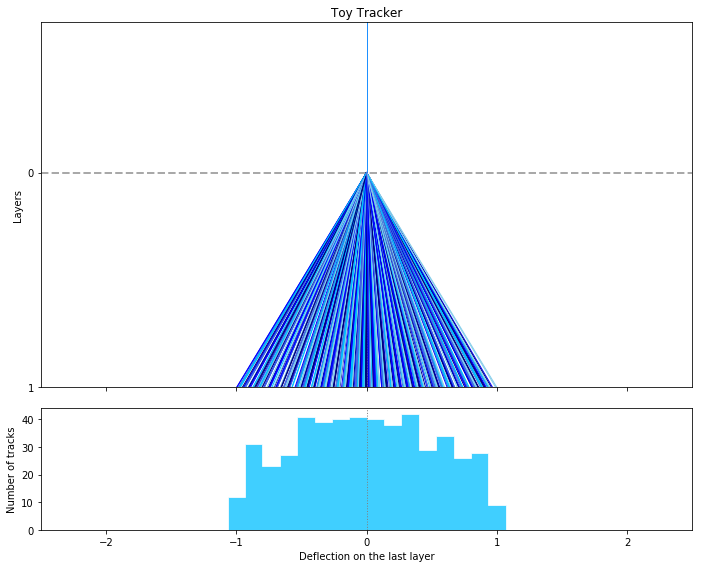

In [14]:
%reload_ext autoreload
import random
import numpy as np
import toyTracker as tk

fig, ax = tk.buildDetector(1, -2.5, 2.5)
colors      = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']

thetaMax = 45 # degrees
nTracks = 500

dXvals  = []
thetas  = []
for t in range(nTracks):
    aTheta = 2*thetaMax * random.uniform(0 , 1) - thetaMax
    thetas.append(aTheta)
    deltaX = getDeflectionWithAngle(aTheta)
    dXvals.append(deltaX)

for dXval in dXvals:
    x = [0., dXval]
    y = [0, 1]
    ax[0].plot(x, y, color=colors[int(dXval*100)%len(colors)])

n, binArray, patches = ax[1].hist(dXvals, 150, range=[minx, maxx], histtype='stepfilled', color='deepskyblue', alpha=0.75 , ec="w")

fig.show()
fig.canvas.draw()
 

Looks good! 


Later we will add layers!

